# **FFT**


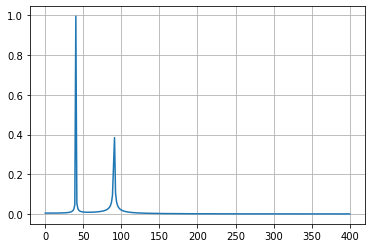

In [ ]:
import numpy as np
from scipy.fftpack import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(40.0 * 2.0*np.pi*x) + 0.5*np.sin(90.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

# **Resample**
Remuestrea señal usando el método de Fourier a lo largo del eje dado.La señal remuestreada comienza con el mismo valor que x pero se muestrea con un espaciado de len (x) / num * (espaciado de x). Debido a que se utiliza un método de Fourier, se supone que la señal es periódica.

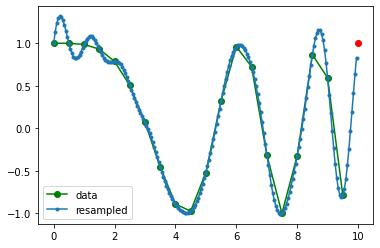

In [ ]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
puntos_resample=10
puntos=20
remuestra= puntos * puntos_resample
x = np.linspace(0, 10, puntos, endpoint=False)
y = np.cos(-x**2/6.0)
f = signal.resample(y, remuestra)
xnew = np.linspace(0, 10, remuestra, endpoint=False)
plt.plot(x, y, 'go-', xnew, f, '.-', 10, y[0], 'ro')
plt.legend(['data', 'resampled'], loc='best')
plt.show()

# **Conolución**

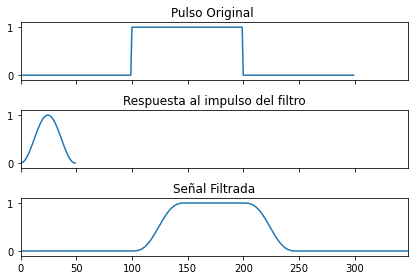

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
sig = np.repeat([0., 1., 0.], 100)
win = signal.hann(50)
filtered = signal.convolve(sig, win, mode='full') / sum(win)

fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Pulso Original ')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Respuesta al impulso del filtro')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Señal Filtrada')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()


# **FIltros digitales**
**iirfilter,butter**


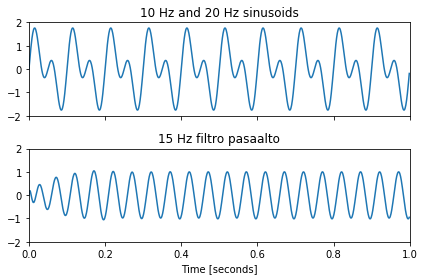

In [ ]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

sos = signal.butter(10, 15, 'hp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('15 Hz filtro pasaalto')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

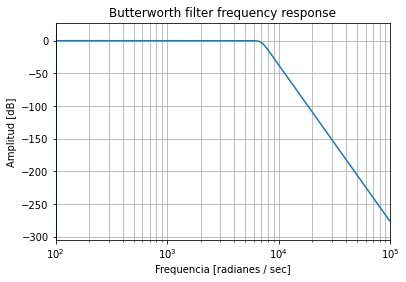

In [ ]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
b, a = signal.butter(12, 7000, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequencia [radianes / sec]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # frecuencia de corte
plt.show()

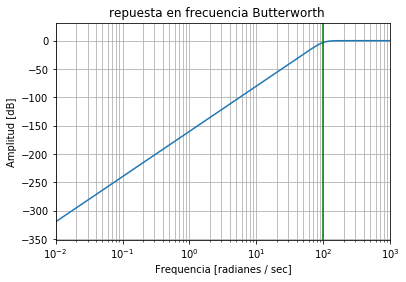

In [ ]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
b, a = signal.butter(4, 100, 'high', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('repuesta en frecuencia Butterworth   ')
plt.xlabel('Frequencia [radianes / sec]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # frecuencia de corte
plt.show()

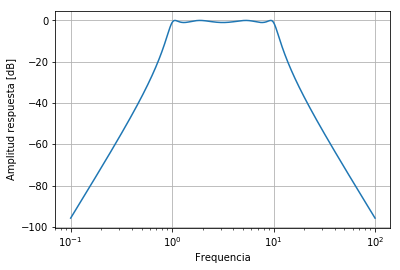

In [ ]:
from scipy.signal import freqs, iirfilter
import matplotlib.pyplot as plt

b, a = iirfilter(4, [1, 10], 1, 60, analog=True, ftype='cheby1')

w, h = freqs(b, a, worN=np.logspace(-1, 2, 1000))

plt.semilogx(w, 20 * np.log10(abs(h)))
plt.xlabel('Frequencia')
plt.ylabel('Amplitud respuesta [dB]')
plt.grid()
plt.show()

# ftype 
Butterworth : ‘butter’

Chebyshev I : ‘cheby1’

Chebyshev II : ‘cheby2’

Cauer/elliptic: ‘ellip’

Bessel/Thomson: ‘bessel’

# **btype**
{‘bandpass’, ‘lowpass’, ‘highpass’, ‘bandstop’}, optional


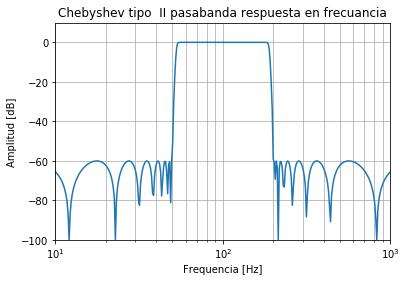

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
b, a = signal.iirfilter(17, [2*np.pi*50, 2*np.pi*200], rs=60, btype='bandpass', analog=True, ftype='cheby2')
w, h = signal.freqs(b, a, 1000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w / (2*np.pi), 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev tipo  II pasabanda respuesta en frecuancia')
ax.set_xlabel('Frequencia [Hz]')
ax.set_ylabel('Amplitud [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

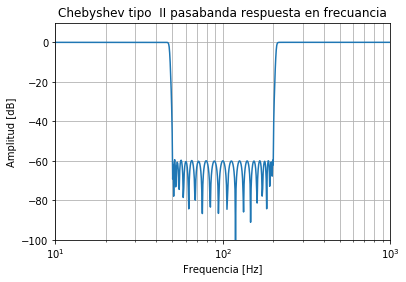

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
b, a = signal.iirfilter(20, [2*np.pi*50, 2*np.pi*200], rs=60, btype='bandstop', analog=True, ftype='cheby2')
w, h = signal.freqs(b, a, 1000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w / (2*np.pi), 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev tipo  II pasabanda respuesta en frecuancia')
ax.set_xlabel('Frequencia [Hz]')
ax.set_ylabel('Amplitud [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

Filtro pasabajo apliación 

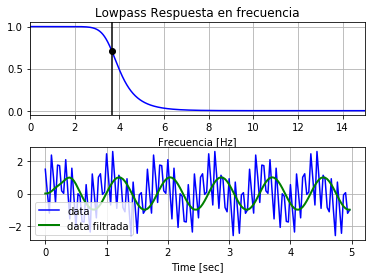

In [ ]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # Frecuencia de muestro
cutoff = 3.667  # frecuencia de corte en Hz

#  coeficientes de filtro para que podamos verificar su respuesta de frecuencia.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Respuesta en frecuencia")
plt.xlabel('Frecuencia [Hz]')
plt.grid()


# 
# 
T = 5.0         # segundos
n = int(T * fs) # numero total de muestras
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filtro butter_lowpass
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='data filtrada')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

La autocorrelación del ruido blanco es un impulso.

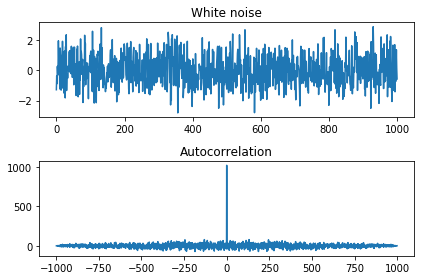

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
sig = np.random.randn(1000)
autocorr = signal.fftconvolve(sig, sig[::-1], mode='full')
fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(sig)
ax_orig.set_title('White noise')
ax_mag.plot(np.arange(-len(sig)+1,len(sig)), autocorr)
ax_mag.set_title('Autocorrelation')
fig.tight_layout()
fig.show()